In [1]:
#Se importan las librerias necesarias, y se inicializan las listas. 
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import random
import Crear

se creo la lista tiempo
2023-11-05 00:00:00
2023-11-05 00:05:00
2023-11-05 00:10:00
2023-11-05 00:15:00
2023-11-05 00:20:00
2023-11-05 00:25:00
2023-11-05 00:30:00
2023-11-05 00:35:00
2023-11-05 00:40:00
2023-11-05 00:45:00
2023-11-05 00:50:00
2023-11-05 00:55:00
2023-11-05 01:00:00
2023-11-05 01:05:00
2023-11-05 01:10:00
2023-11-05 01:15:00
2023-11-05 01:20:00
2023-11-05 01:25:00
2023-11-05 01:30:00
2023-11-05 01:35:00
2023-11-05 01:40:00
2023-11-05 01:45:00
2023-11-05 01:50:00
2023-11-05 01:55:00
2023-11-05 02:00:00
2023-11-05 02:05:00
2023-11-05 02:10:00
2023-11-05 02:15:00
2023-11-05 02:20:00
2023-11-05 02:25:00
2023-11-05 02:30:00
2023-11-05 02:35:00
2023-11-05 02:40:00
2023-11-05 02:45:00
2023-11-05 02:50:00
2023-11-05 02:55:00
2023-11-05 03:00:00
2023-11-05 03:05:00
2023-11-05 03:10:00
2023-11-05 03:15:00
2023-11-05 03:20:00
2023-11-05 03:25:00
2023-11-05 03:30:00
2023-11-05 03:35:00
2023-11-05 03:40:00
2023-11-05 03:45:00
2023-11-05 03:50:00
2023-11-05 03:55:00
2023-11-05 04:00

KeyboardInterrupt: 

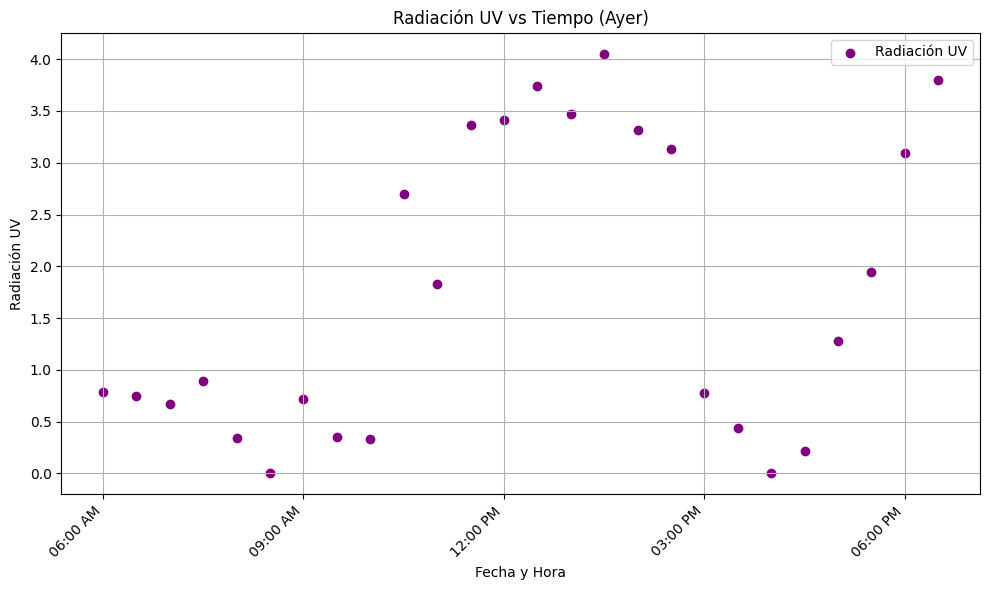

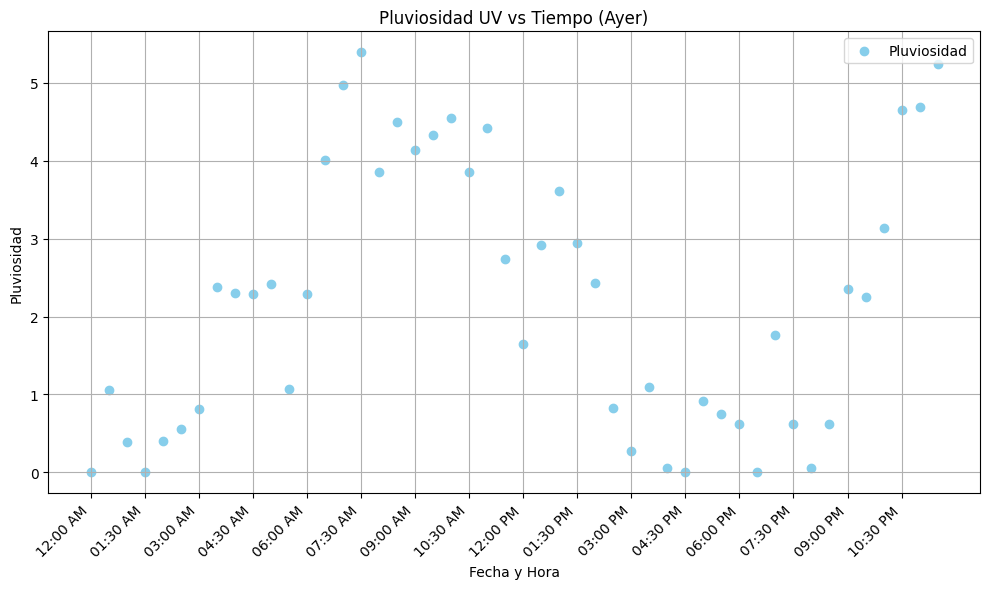

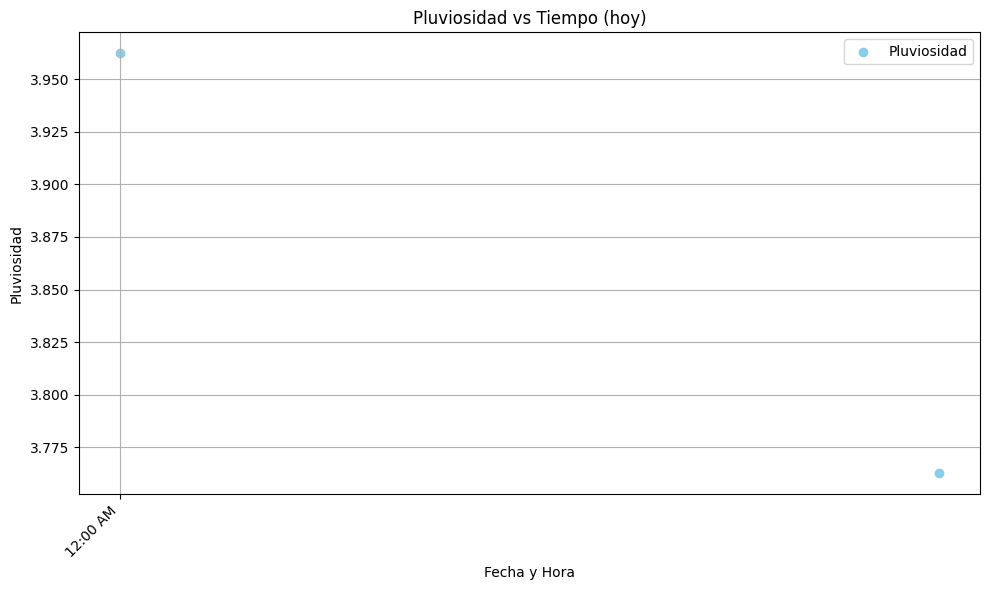

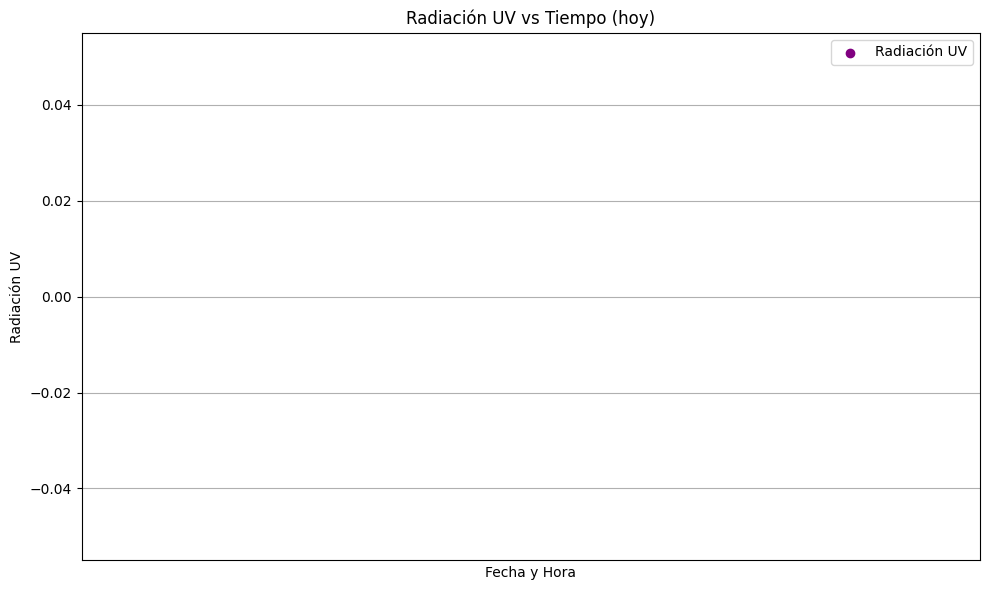

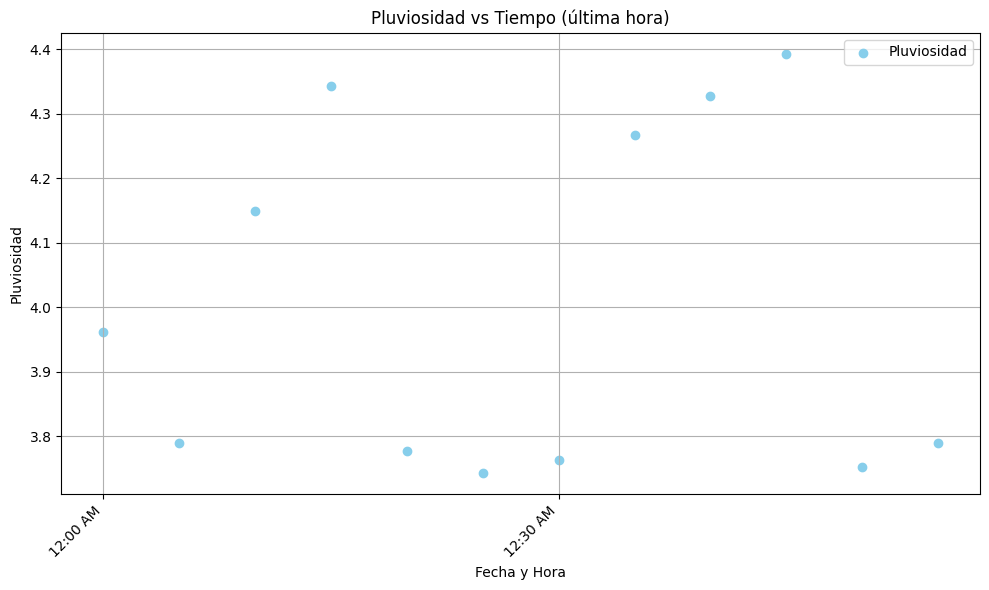

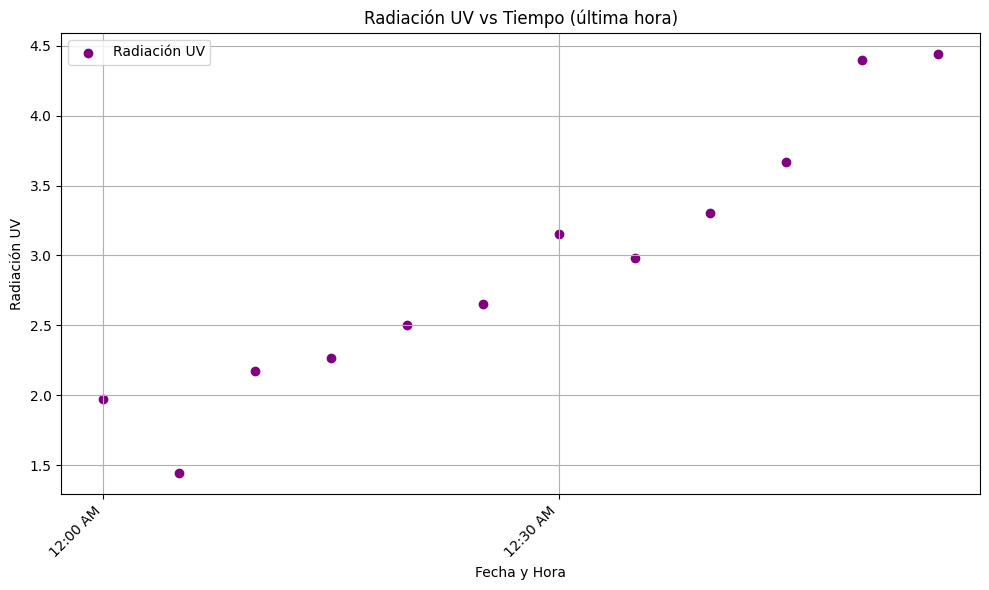

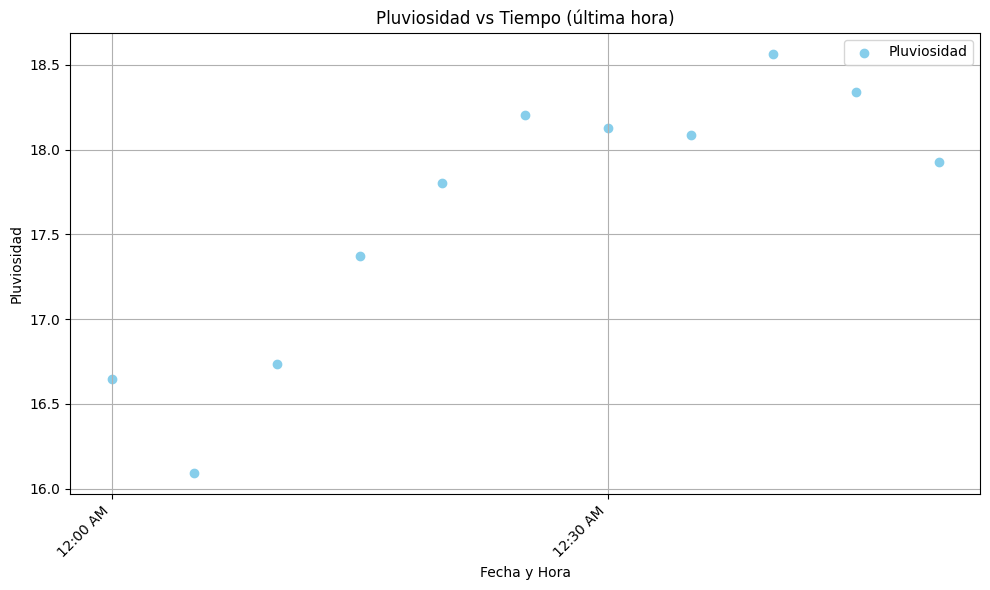

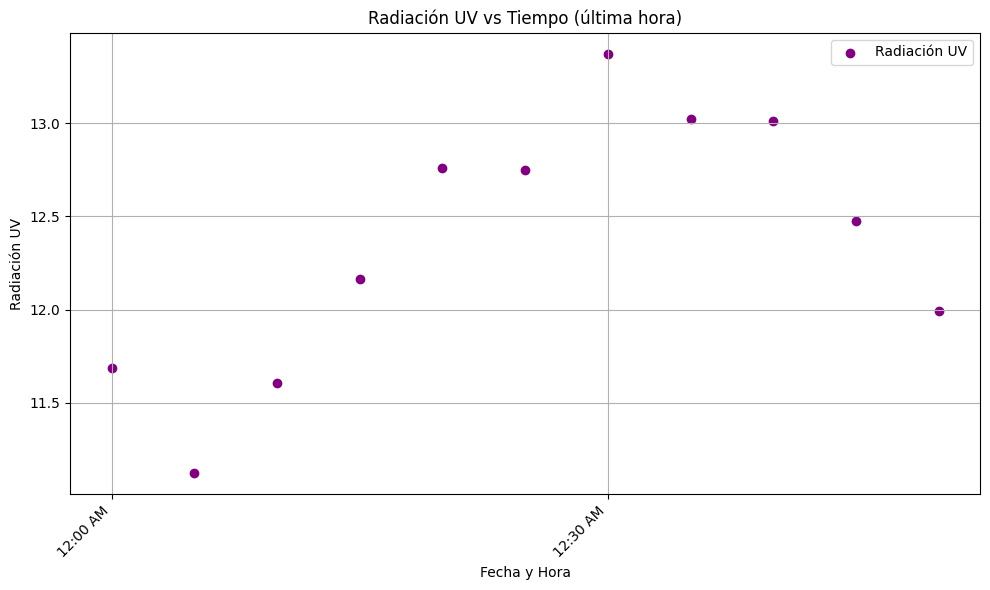

In [2]:
import schedule
import time 
fecha_inicio = datetime(2023, 11, 5, 0, 0)

# Comprobar si la lista existe
try:
    print(tiempo)
except NameError:
    tiempo= Crear.CrearTiempo(fecha_inicio)
    print("se creo la lista tiempo")
    for element in tiempo:
        print(element)

try:
    print(PL_list)
except NameError:
    PL_list= Crear.CrearParametro(tiempo,0,30)
    print("se creo la lista Pluviosidad")
    print(PL_list)

try:
    print(UV_list)
except NameError:
    UV_list= Crear.CrearParametro(tiempo,0,14)
    print("se creo la lista Radiacion ")
    print(UV_list)


datos = {
    'Fecha': tiempo,
    'Pluviosidad': PL_list,
    'Radiación UV': UV_list,
}


#Actualizamos la base de datos AL COMENZAR.
import funciones
funciones.DataBase(datos)

#Se crean las imagenes. 
tabla= 'tabla_excel.xlsx'
funciones.Todo(tabla)


# Programar las actualizaciones automaticas
schedule.every().day.at("00:00:03").do(funciones.Todo,tabla)

# Programar la tarea cada 5 minutos
schedule.every(5).minutes.do(funciones.Hora,tabla)
schedule.every(5).minutes.do(funciones.DataBase,datos)
# Programar la tarea cada media hora
schedule.every(30).minutes.do(funciones.Hoy,tabla)

while True:
    schedule.run_pending()
    time.sleep(1)